# Introduction

In this Notebook, we are going to explore bike rental dataset.
You can download the dataset from Kaggle: [Bike rental](https://www.kaggle.com/c/bike-sharing-demand/data).

# Get the Data and explore it

We have to import Pandas and read the csv file of bike rental.

In [1]:
import pandas as pd
import numpy as np

In [3]:
#read the dataset using pandas
bike_rental = pd.read_csv('train.csv')

In [4]:
#check the head of the dataframe
bike_rental.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Let's see how many rows and columns are there.

In [5]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


**Here, we only have numerical values and we don't have null values.**

In [6]:
print(bike_rental.shape)

(10886, 12)


As you can see, we can do that either by using **info() method** or by using **shape**.

To better understand the values, here the description of the columns:

**datetime** - hourly date + timestamp  <br>
**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>
**holiday** - whether the day is considered a holiday <br>
**workingday** - whether the day is neither a weekend nor holiday <br>
**weather** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
**temp** - temperature in Celsius <br>
**atemp** - "feels like" temperature in Celsius <br>
**humidity** - relative humidity <br>
**windspeed** - wind speed <br>
**casual** - number of non-registered user rentals initiated <br>
**registered** - number of registered user rentals initiated <br>
**count** - number of total rentals

**What's the average rental count?**

In [7]:
bike_rental['count'].mean()

191.57413191254824

In [8]:
bike_rental['count'].max()

977

In [9]:
bike_rental['count'].min()

1

So, as you can see the **average** rental count is = **191** approximately.<br>
The **maximum** count reached is **977**.<br>
The **minimum** rental count is **1**. 

To get description about the other column mean, max, min, and other we use describe method.

In [13]:
bike_rental.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Now, let's see what **season** has the **biggest rental count**.
To do that, we will use some visualizations using **Seaborn**. <br>
Before, answering this question, we will explore different distributions.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

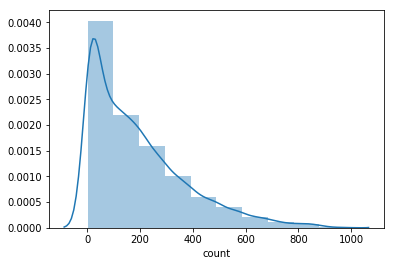

In [20]:
sns.distplot(bike_rental['count'],bins=10)

As we can see most of the rental counts are between 0 and 100. We have a **right-skewed distribution**.

How many are registered users from those who rent a bike at each time?

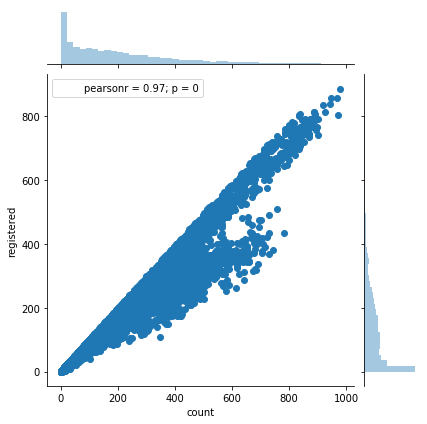

In [24]:
sns.jointplot(x='count',y='registered',data=bike_rental,kind='scatter')

We can notice a high correlation between these two variables.

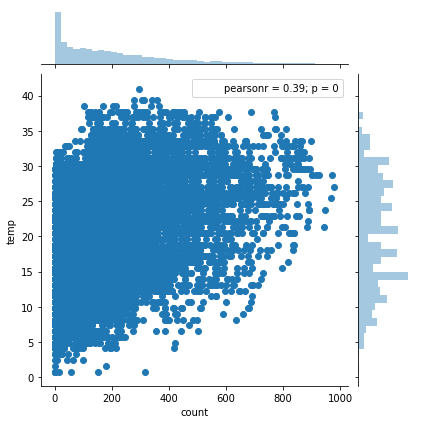

In [29]:
sns.jointplot(x='count',y='temp',data=bike_rental,kind='scatter')

Also, we can notice that the correlation between count and temperature need to be explored further.

Next, we are going to explore the correlation between different variables by using a matrix.

In [30]:
corr = bike_rental.corr()

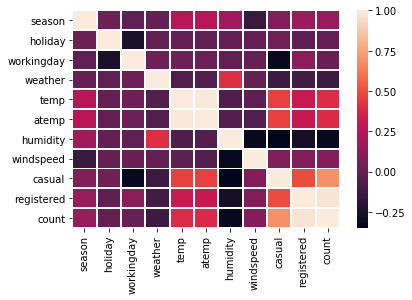

In [32]:
sns.heatmap(corr, linecolor='white',linewidths=1)

Now, back the our question. To be able to know in what season there is the biggest rental counts, we need to transform our season variable into a categorical variable because it's currently a numerical variable.

In [33]:
bike_rental['season'] = bike_rental.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

Then, we can do some plots.

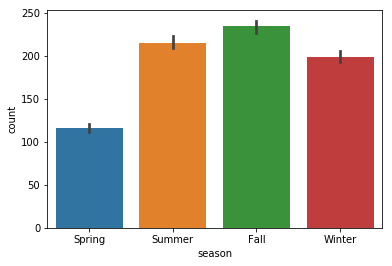

In [34]:
sns.barplot(x='season',y='count',data=bike_rental)

barplot does by default use the **average**(mean) in each category. So, in average, summer shows more bike rentals than in the other seasons.

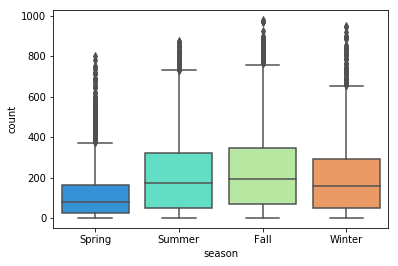

In [36]:
sns.boxplot(x="season", y="count", data=bike_rental,palette='rainbow')

The Boxplot shows that Spring has the lowest rentals while Fall seems to have the highest rentals. Let's verify a filter by season on our dataset and sum the counts.

In [37]:
bike_rental[bike_rental['season']=='Summer']['count'].sum()

588282

In [38]:
bike_rental[bike_rental['season']=='Fall']['count'].sum()

640662

In [39]:
bike_rental[bike_rental['season']=='Spring']['count'].sum()

312498

In [40]:
bike_rental[bike_rental['season']=='Winter']['count'].sum()

544034

The result confirm our hypothesis that the **Fall** marks the **highest rentals**.